In [130]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'", "sqlite:///StaterData.db")

# Drop dates for testing purposes
# data.drop(['Date received', 'Date sent to company'], axis=1)

#Limit test size due to performance issues
data = data.loc[:100]

In [131]:
data.head()

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2021-05-25 00:00:00.000000,Mortgage,FHA mortgage,Applying for a mortgage or refinancing an exis...,None,I am to the closing point of refinancing with ...,None,"PLANET HOME LENDING, LLC",MN,55330,None,1,Web,2021-05-25 00:00:00.000000,Closed with explanation,1,1,4403834
1,5,2023-02-09 00:00:00.000000,Mortgage,Conventional home mortgage,Trouble during payment process,None,I filed a complaint with the CFPB about Wells ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,07005,Older American,1,Web,2023-02-09 00:00:00.000000,Closed with explanation,1,1,6550930
2,7,2018-01-23 00:00:00.000000,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,I am trying to save my home from foreclosure b...,Company believes it acted appropriately as aut...,"Servis One, Inc., Titusville, PA Branch",FL,33406,None,1,Web,2018-01-23 00:00:00.000000,Closed with explanation,1,1,2791568
3,9,2022-01-30 00:00:00.000000,Mortgage,Conventional home mortgage,Trouble during payment process,None,I have been unable to access the online portal...,Company has responded to the consumer and the ...,"LAKEVIEW LOAN SERVICING, LLC",AZ,85743,None,1,Web,2022-01-30 00:00:00.000000,Closed with explanation,1,1,5164317
4,10,2023-02-22 00:00:00.000000,Mortgage,FHA mortgage,Struggling to pay mortgage,None,I had a mortgage with Wells Fargo Home Mortgag...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,77479,Older American,1,Web,2023-02-22 00:00:00.000000,Closed with explanation,1,1,6600763


In [132]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.3225806451612903


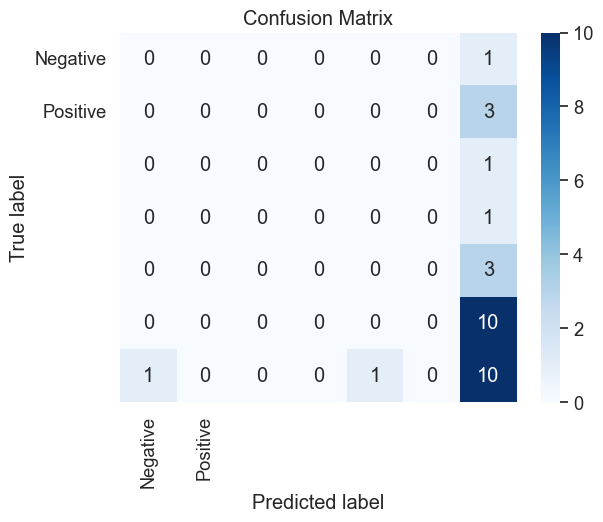

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# make predictions on test data using trained model
y_pred = rf_model.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [134]:
from sklearn.metrics import classification_report
import pandas as pd

# Create a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Print the DataFrame
print(df)



                                                    precision    recall  \
Application, originator, mortgage broker             0.000000  0.000000   
Applying for a mortgage or refinancing an exist...   0.000000  0.000000   
Closing on a mortgage                                0.000000  0.000000   
Incorrect information on your report                 0.000000  0.000000   
Loan servicing, payments, escrow account             0.000000  0.000000   
Struggling to pay mortgage                           0.000000  0.000000   
Trouble during payment process                       0.344828  0.833333   
accuracy                                             0.322581  0.322581   
macro avg                                            0.049261  0.119048   
weighted avg                                         0.133482  0.322581   

                                                    f1-score    support  
Application, originator, mortgage broker            0.000000   1.000000  
Applying for a mortgage or

C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


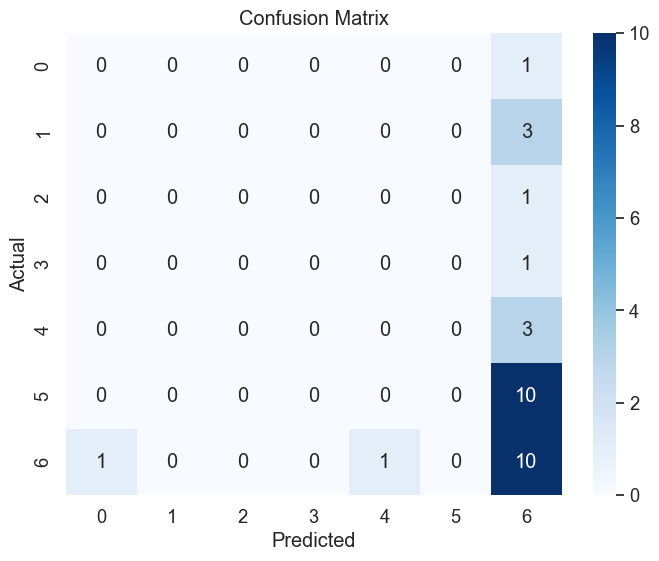

In [135]:
# Create a larger heatmap with bigger font size
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


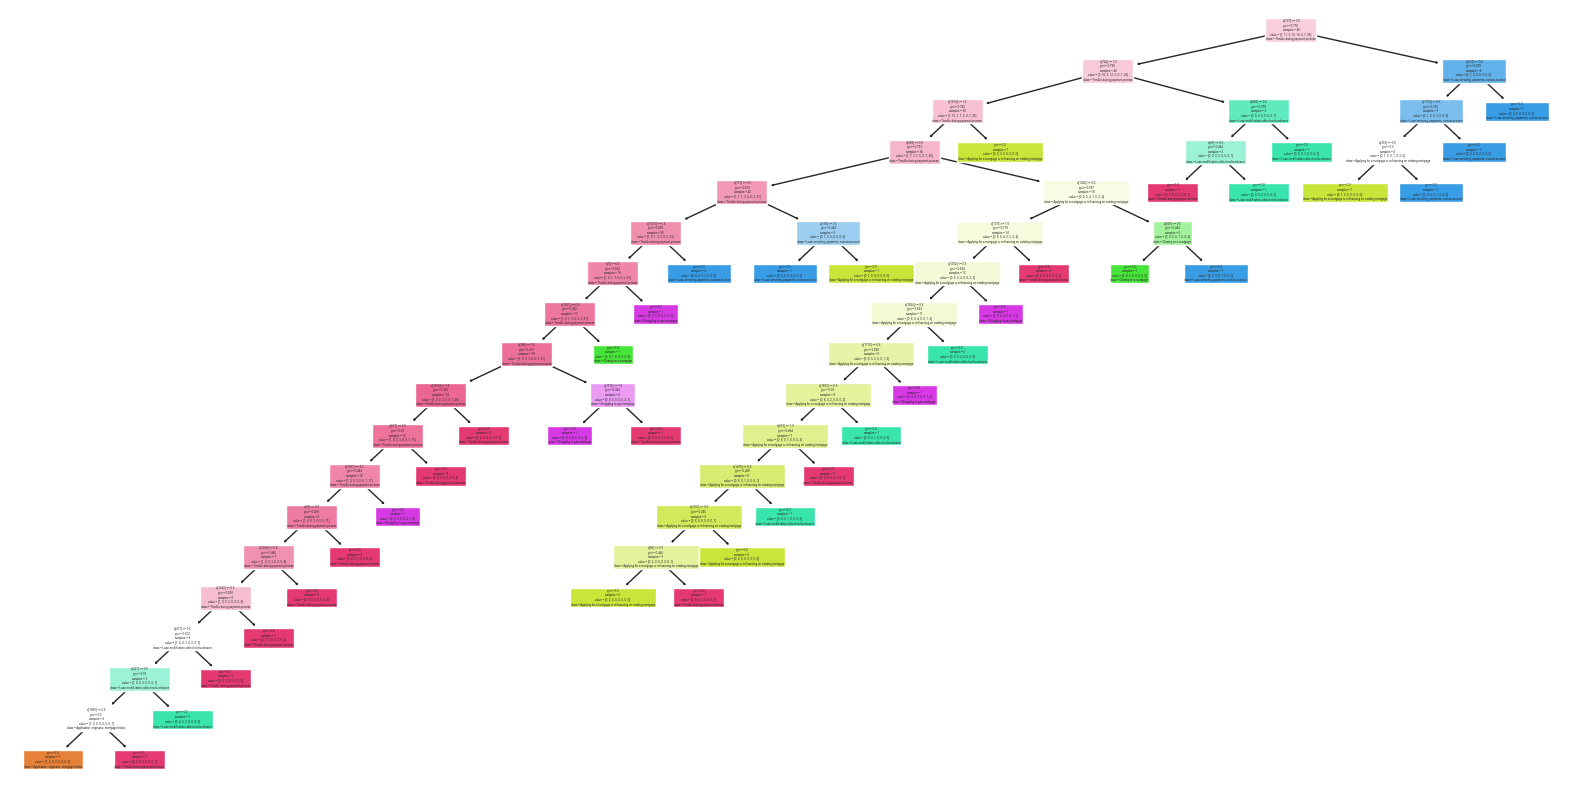

In [136]:
from sklearn.tree import plot_tree

# Visualize the first tree in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=None, class_names=rf_model.classes_, filled=True)
plt.show()
